In [138]:
import pickle as pl
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter

In [143]:
K = [5, 10, 15, 20, 25, 30]

In [144]:
def read(NAME):
    mean_absolute_error = pl.load(open(NAME + "/mean_absolute_error.pkl", "rb"))
    privacy_risk = pl.load(open(NAME + "/privacy_risk.pkl", "rb"))
    fraction_vulnerables = pl.load(open(NAME + "/fraction_vulnerables.pkl", "rb"))
    
    return {"mean_absolute_error": mean_absolute_error, "privacy_risk": privacy_risk, "fraction_vulnerables": fraction_vulnerables}

ml1m = read("ml-1m")
douban = read("douban")
ciao = read("ciao")

In [147]:
def print_frac_vulnerables(data, k_idx=1):
    print("UserKNN: %.2f" % (data["UserKNN"][k_idx] * 100))
    print("UserKNN_DP: %.2f" % (data["UserKNN_DP"][k_idx] * 100))
    print("UserKNN_Static_DP: %.2f" % (data["UserKNN_Static_DP"][k_idx] * 100))
    print("UserKNN_Dynamic_DP: %.2f" % (data["UserKNN_Dynamic_DP"][k_idx] * 100))

print("=== MovieLens 1M ===")
print_frac_vulnerables(ml1m["fraction_vulnerables"], k_idx=1)
print()

print("=== Douban ===")
print_frac_vulnerables(douban["fraction_vulnerables"], k_idx=1)
print()

#print("=== LastFM ===")
#print_frac_vulnerables(lfm["fraction_vulnerables"], k_idx=1)
#print()

print("=== Ciao ===")
print_frac_vulnerables(ciao["fraction_vulnerables"], k_idx=1)
print()

#print("=== Goodreads ===")
#print_frac_vulnerables(goodreads["fraction_vulnerables"], k_idx=1)
#print()

=== MovieLens 1M ===
UserKNN: 0.00
UserKNN_DP: 40.80
UserKNN_Static_DP: 23.62
UserKNN_Dynamic_DP: 37.82

=== Douban ===
UserKNN: 0.00
UserKNN_DP: 60.37
UserKNN_Static_DP: 44.47
UserKNN_Dynamic_DP: 55.70

=== Ciao ===
UserKNN: 0.00
UserKNN_DP: 2.39
UserKNN_Static_DP: 0.38
UserKNN_Dynamic_DP: 2.37



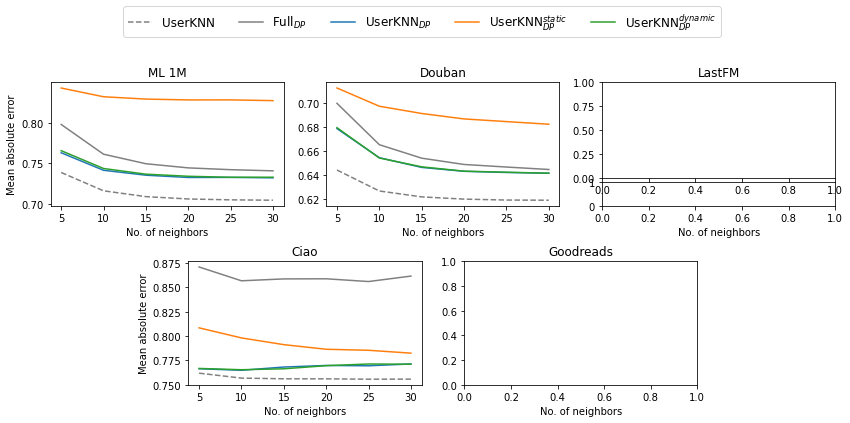

In [145]:
def plot(ax, data): 
    ax.plot(K, data["UserKNN"], color="gray", linestyle="dashed")
    ax.plot(K, data["Full_DP"], color="gray", linestyle="solid")
    ax.plot(K, data["UserKNN_DP"], color="C0")
    ax.plot(K, data["UserKNN_Static_DP"], color="C1")
    ax.plot(K, data["UserKNN_Dynamic_DP"], color="C2")

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, fig=fig)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2, fig=fig)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, fig=fig)
axes = [ax1, ax2, ax3, ax4, ax5]

plot(axes[0], ml1m["mean_absolute_error"])
plot(axes[1], douban["mean_absolute_error"])
plot(axes[3], ciao["mean_absolute_error"])
#plot(axes[4], goodreads_dp["mae"], K=goodreads_dp["K"])

ax = axes[2]
divider = make_axes_locatable(ax)
ax_top = divider.new_vertical(size="400%", pad=0.05)
fig.add_axes(ax_top)
"""ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["userknn_full"], color="gray", linestyle="solid", alpha=1)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["userknn"], color="C0", linestyle="dashed", alpha=1)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["expect"], color="C1", linestyle="dashed", alpha=1)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["gain"], color="C2", linestyle="dashed", alpha=1)
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["userknn_reuse"], color="C0", linestyle="solid")
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["expect_reuse"], color="C1", linestyle="solid")
ax_top.plot(lfm_dp["K"], lfm_dp["mae"]["gain_reuse"], color="C2", linestyle="solid")
ax.plot(lfm_dp["K"], lfm_dp["mae"]["userknn_no"], color="gray", linestyle="dashed", alpha=1)
ax.spines['top'].set_visible(False)
ax.set_ylim(44.2, 52)
ax_top.set_ylim(105.5, 134.5)
ax_top.tick_params(bottom=False, labelbottom=False)
ax_top.spines['bottom'].set_visible(False)
d = .5
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)"""

axes[0].set_ylabel("Mean absolute error")
axes[3].set_ylabel("Mean absolute error")

axes[0].set_xlabel("No. of neighbors")
axes[1].set_xlabel("No. of neighbors")
axes[2].set_xlabel("No. of neighbors")
axes[3].set_xlabel("No. of neighbors")
axes[4].set_xlabel("No. of neighbors")
axes[0].set_title("ML 1M")
axes[1].set_title("Douban")
ax_top.set_title("LastFM")
axes[3].set_title("Ciao")
axes[4].set_title("Goodreads")

lines = [Line2D([0], [0], color="gray", linestyle="dashed")] # UserKNN
lines.append(Line2D([0], [0], color="gray", linestyle='solid')) # FullDP
lines.append(Line2D([0], [0], color="C0")) # UserKNN_DP
lines.append(Line2D([0], [0], color="C1")) # UserKNN_Static_DP
lines.append(Line2D([0], [0], color="C2")) # UserKNN_Dynamic_DP
labels = ["UserKNN", r"Full$_{DP}$", r"UserKNN$_{DP}$", r"UserKNN$^{static}_{DP}$", r"UserKNN$^{dynamic}_{DP}$"]

fig.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)

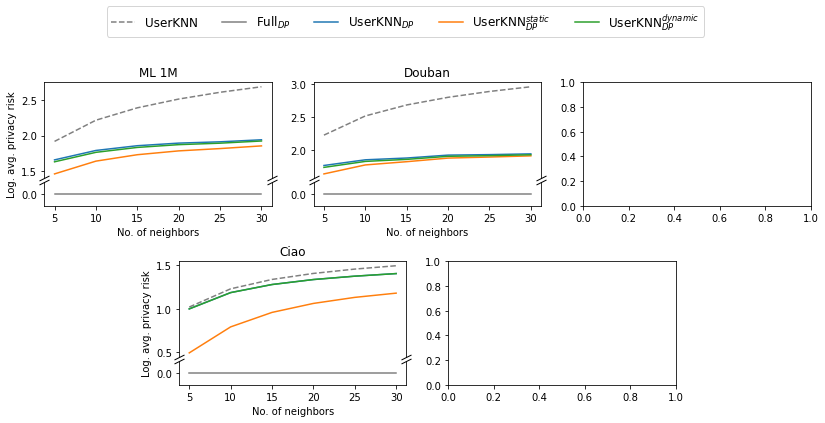

In [146]:
def plot(ax, data): 
    def split_axis(ax):
        divider = make_axes_locatable(ax)
        ax_top = divider.new_vertical(size="400%", pad=0.05)
        
        fig.add_axes(ax_top)
        ax.spines['top'].set_visible(False)
        ax_top.tick_params(bottom=False, labelbottom=False)
        ax_top.spines['bottom'].set_visible(False)
        
        ax_top.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        
        d = .5
        kwargs = dict(marker=[(-1, -d), (1, d)], markersize=10, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
        ax_top.plot([0, 1], [0, 0], transform=ax_top.transAxes, **kwargs)
        ax.plot([0, 1], [1, 1], transform=ax.transAxes, **kwargs)
        ax.set_yticks([0.0])
        
        return ax_top, ax
    
    ax_top, ax_bottom = split_axis(ax)
    ax_top.plot(K, np.log10(data["UserKNN"]), color="gray", linestyle="dashed")
    ax_top.plot(K, np.log10(data["UserKNN_DP"]), color="C0")
    ax_top.plot(K, np.log10(data["UserKNN_Static_DP"]), color="C1")
    ax_top.plot(K, np.log10(data["UserKNN_Dynamic_DP"]), color="C2")
    ax_bottom.plot(K, data["Full_DP"], color="gray", linestyle="solid")
    
    return ax_top, ax_bottom

fig = plt.figure(figsize=(12, 6))
ax1 = plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2, fig=fig)
ax2 = plt.subplot2grid((2,6), (0,2), colspan=2, fig=fig)
ax3 = plt.subplot2grid((2,6), (0,4), colspan=2, fig=fig)
ax4 = plt.subplot2grid((2,6), (1,1), colspan=2, fig=fig)
ax5 = plt.subplot2grid((2,6), (1,3), colspan=2, fig=fig)
axes = [ax1, ax2, ax3, ax4, ax5]


ax = fig.add_subplot(211, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)
ax = fig.add_subplot(268, frameon=False)
ax.set_ylabel("Log. avg. privacy risk")
ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
ax.grid(False)

ax1_top, ax1_bottom = plot(axes[0], ml1m["privacy_risk"])
ax2_top, ax2_bottom = plot(axes[1], douban["privacy_risk"])
#ax3_top, ax3_bottom = plot(axes[2], lfm_dp["privacy_risk_dp"], K=ciao_dp["K"])
ax4_top, ax4_bottom = plot(axes[3], ciao["privacy_risk"])
#ax5_top, ax5_bottom = plot(axes[4], goodreads_dp["privacy_risk_dp"], K=goodreads_dp["K"])

ax1_bottom.set_xlabel("No. of neighbors")
ax2_bottom.set_xlabel("No. of neighbors")
#ax3_bottom.set_xlabel("No. of neighbors")
ax4_bottom.set_xlabel("No. of neighbors")
#ax5_bottom.set_xlabel("No. of neighbors")
ax1_top.set_title("ML 1M")
ax2_top.set_title("Douban")
#ax3_top.set_title("LastFM")
ax4_top.set_title("Ciao")
#ax5_top.set_title("Goodreads")

lines = [Line2D([0], [0], color="gray", linestyle="dashed")] # UserKNN
lines.append(Line2D([0], [0], color="gray", linestyle='solid')) # FullDP
lines.append(Line2D([0], [0], color="C0")) # UserKNN_DP
lines.append(Line2D([0], [0], color="C1")) # UserKNN_Static_DP
lines.append(Line2D([0], [0], color="C2")) # UserKNN_Dynamic_DP
labels = ["UserKNN", r"Full$_{DP}$", r"UserKNN$_{DP}$", r"UserKNN$^{static}_{DP}$", r"UserKNN$^{dynamic}_{DP}$"]

fig.legend(lines, labels, ncol=5, loc='upper center', bbox_to_anchor=(0.5, .99), fontsize="large")
fig.tight_layout()
fig.subplots_adjust(top=.8, bottom=0.1, hspace=0.45, wspace=0.45)
fig.align_ylabels(axes)